# EDA 

In [12]:
import librosa
import os
import matplotlib.pyplot as plt
import numpy as np

## read data 

Sampling rate: 44100, Duration: 1.127687074829932s


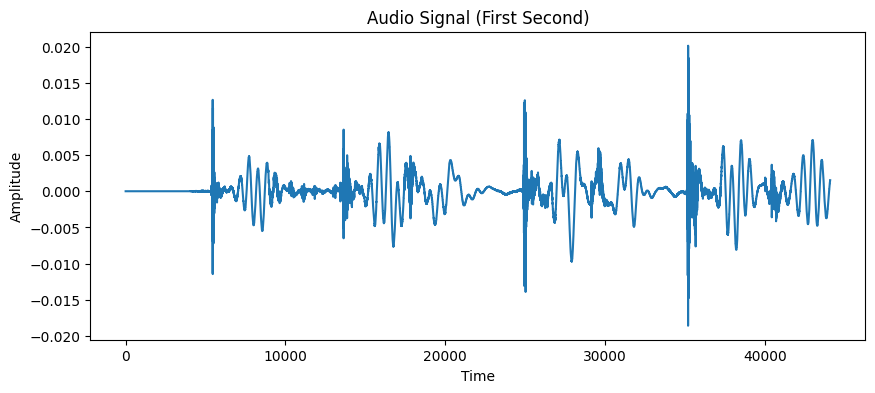

In [ ]:
# Example: Load an audio file
root_path = "../data/"

file_name = 'sample1/words/word_1.wav'
signal, sr = librosa.load(root_path + file_name, sr=None)
duration = librosa.get_duration(y=signal, sr=sr)
print(f'Sampling rate: {sr}, Duration: {duration}s')

# Plot a small portion of the audio signal
plt.figure(figsize=(10, 4))
plt.plot(signal[:sr])  # Plot first second of audio
plt.title('Audio Signal (First Second)')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.show()

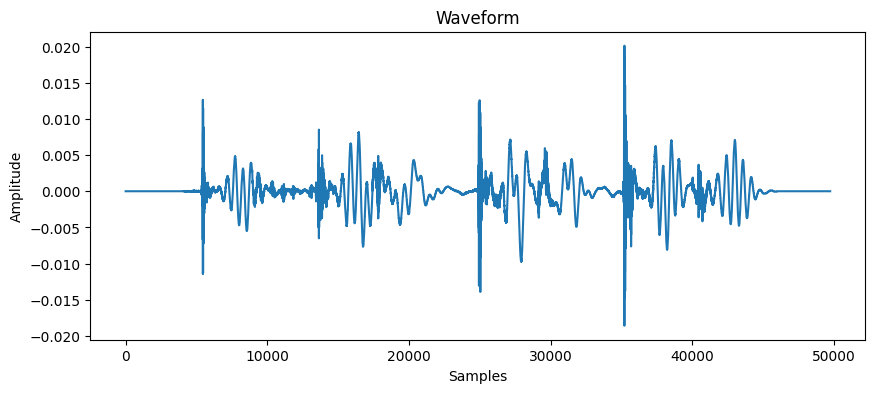

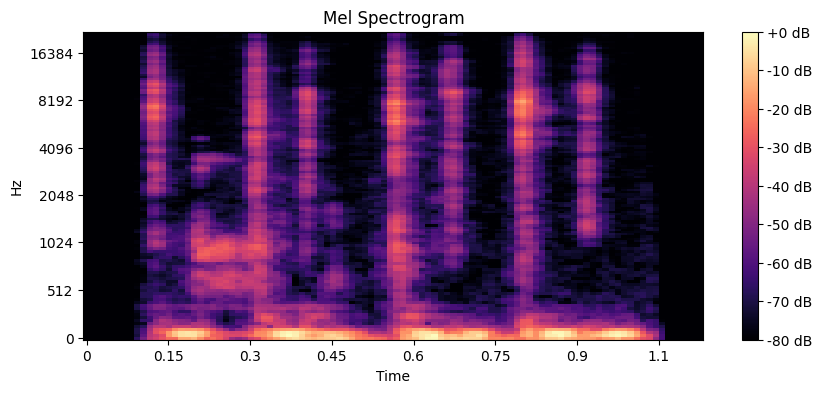

In [14]:
# Visualize the waveform
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

# Visualize the spectrogram
import librosa.display
spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


In [30]:
spectrogram.shape

(128, 98)

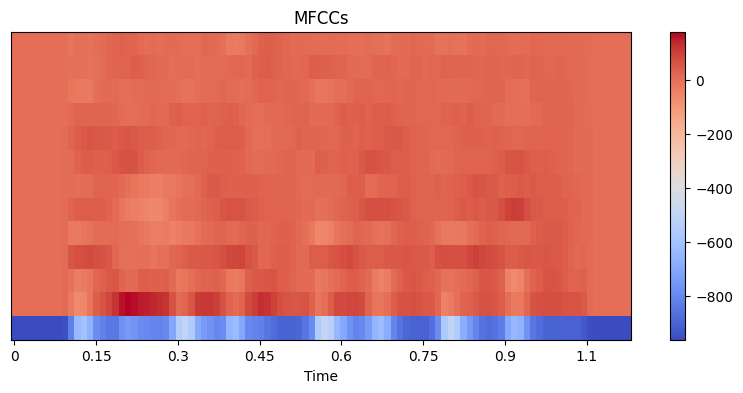

In [15]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()


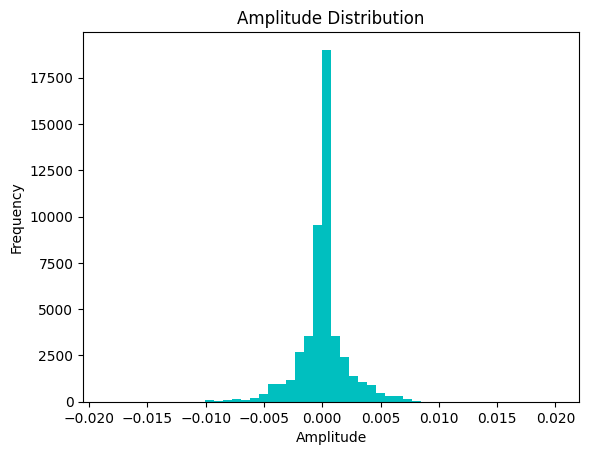

In [16]:
# Example: Show histogram of amplitudes
plt.hist(signal, bins=50, color='c')
plt.title('Amplitude Distribution')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Example: Simple thresholding for event detection
threshold = 0.01
keypress_indices = np.where(signal > threshold)[0]
print(f'Number of keypress events detected: {len(keypress_indices)}')


Number of keypress events detected: 22


C:\Users\reza\AppData\Local\Temp\ipykernel_35716\1509241748.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, y_axis='log', x_axis='time')


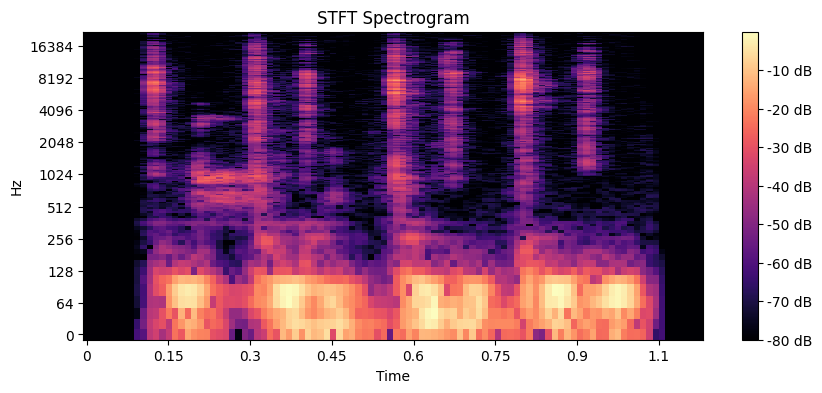

In [24]:
# Compute the short-time Fourier transform (STFT)
D = librosa.stft(signal)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.title('STFT Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


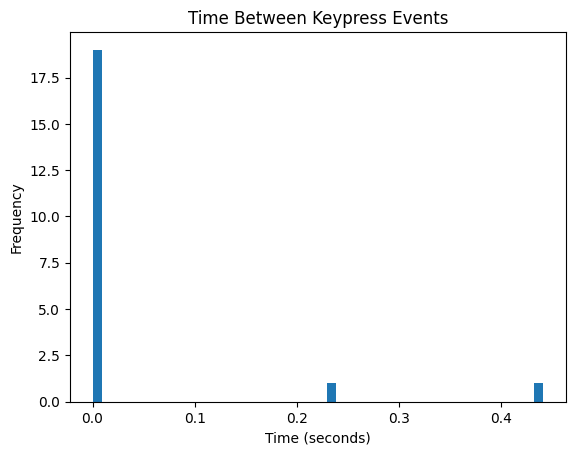

In [25]:
# Compute differences between keypress timestamps
keypress_times = np.where(signal > threshold)[0] / sr  # Assuming threshold-based detection
time_differences = np.diff(keypress_times)
plt.hist(time_differences, bins=50)
plt.title('Time Between Keypress Events')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


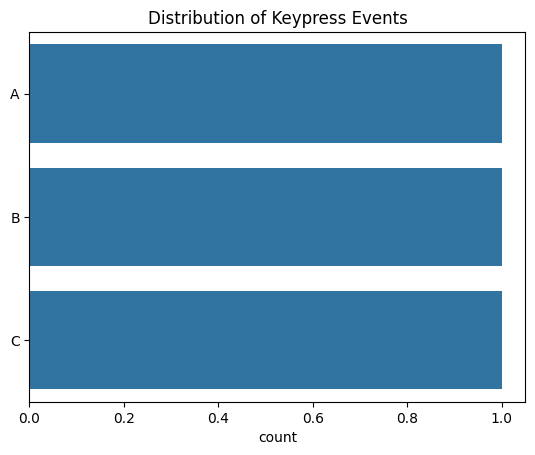

In [27]:
# Example (assuming labeled data with keys)
import seaborn as sns
keypress_labels = ['A', 'B', 'C']  # Example key labels
sns.countplot(keypress_labels)
plt.title('Distribution of Keypress Events')
plt.show()
